In [4]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

# high

In [5]:
path_HLF = '/kaggle/input/phys591000-higgs-production/High_Level_Features/'
Train_Data_HLF = pd.read_csv(path_HLF + 'Data_Project_Highlevelfeatures_Train.csv')
Test_Data_HLF  = pd.read_csv(path_HLF + 'Data_Project_Highlevelfeatures_Test.csv')
Val_Data_HLF   = pd.read_csv(path_HLF + 'Data_Project_Highlevelfeatures_Val.csv')

print('shape of {}: {}'.format('Train_Data_HLF', Train_Data_HLF.shape))
print('shape of {}: {}'.format('Test_Data_HLF', Test_Data_HLF.shape))
print('shape of {}: {}'.format('Val_Data_HLF', Val_Data_HLF.shape))

shape of Train_Data_HLF: (140000, 17)
shape of Test_Data_HLF: (40000, 17)
shape of Val_Data_HLF: (40000, 17)


In [6]:
print('num of train eventindex id:', np.shape(np.unique(Train_Data_HLF['eventindex'])))
print('shape of {}: {}'.format('Train_Data_HLF', Train_Data_HLF.shape))
Train_Data_HLF

num of train eventindex id: (35000,)
shape of Train_Data_HLF: (140000, 17)


,higgs_pt,higgs_eta,higgs_m,non_higgs_leading_pt,non_higgs_leading_eta,non_higgs_leading_m,mjj,girth,CIJS,SIJS,DeltaEta,weight,isGGH,isVBF,isVH,isttH,eventindex
0,496.540263,-1.763042,123.389300,350.670364,-1.260523,142.503377,293.929760,0.367132,0.050352,0.137014,0.407864,0.541775,1,0,0,0,0
1,524.927305,-1.157187,150.014731,566.076110,0.672808,85.865417,351.254743,0.069989,0.911249,0.001864,1.066270,0.541775,1,0,0,0,1
2,627.121645,1.460639,127.978362,717.547026,0.255241,50.247752,1057.453825,0.036624,0.884325,0.091906,2.091752,0.541775,1,0,0,0,2
3,416.387587,-1.561271,95.427194,307.823744,0.339110,28.038310,842.754560,0.025504,0.963083,0.023796,2.939813,0.541775,1,0,0,0,3
4,413.778641,0.705190,125.016845,418.277521,-0.294598,75.312996,252.091531,0.110780,0.750340,0.195364,0.319952,0.541775,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,448.720145,0.666062,85.828900,900.034173,-0.668238,190.621285,1194.063088,0.196656,0.025947,0.572225,0.140481,-0.003674,0,0,0,1,34995
139996,828.156872,-1.474188,197.790587,934.544016,0.867063,257.264928,1159.469625,0.194458,0.483907,0.274863,2.985908,0.003674,0,0,0,1,34996
139997,929.944632,-0.773685,173.677304,608.587577,-1.640232,60.221012,822.108962,0.019720,0.959953,0.019532,1.568250,-0.003674,0,0,0,1,34997
139998,559.551559,-0.551262,108.654471,243.051886,-0.917649,100.851346,964.739525,2.188825,0.003930,0.087320,2.647047,0.003674,0,0,0,1,34998


## 先用用看 Low level feature data

In [ ]:
path_LLF = '/kaggle/input/phys591000-higgs-production/Data_Constituent/'
Train_Data_LLF = pd.read_csv(path_LLF + 'Data_Constituent_Train.csv')
Test_Data_LLF  = pd.read_csv(path_LLF + 'Data_Constituent_Test.csv')
Val_Data_LLF   = pd.read_csv(path_LLF + 'Data_Constituent_Val.csv')

print('shape of {}: {}'.format('Train_Data_LLF', Train_Data_LLF.shape))
print('shape of {}: {}'.format('Test_Data_LLF', Test_Data_LLF.shape))
print('shape of {}: {}'.format('Val_Data_LLF', Val_Data_LLF.shape))

In [ ]:
print('num of train jet_index id:', np.shape(np.unique(Train_Data_LLF['jet_index'])))
print('shape of {}: {}'.format('Train_Data_LLF', Train_Data_LLF.shape))
Train_Data_LLF

In [ ]:
print('num of val jet_index id:', np.shape(np.unique(Val_Data_LLF['jet_index'])))
print('shape of {}: {}'.format('Val_Data_LLF', Val_Data_LLF.shape))
Val_Data_LLF

In [ ]:
print(Train_Data_LLF.columns)
features = ['pt', 'eta', 'phi', 'e', 'rel_eta', 'rel_phi']

GGH_Train_LLF = Train_Data_LLF[Train_Data_LLF['label']==0][features]
VBF_Train_LLF = Train_Data_LLF[Train_Data_LLF['label']==1][features]
VH_Train_LLF  = Train_Data_LLF[Train_Data_LLF['label']==2][features]
ttH_Train_LLF = Train_Data_LLF[Train_Data_LLF['label']==3][features]

# check total number of each jet
print('shape of {}: {}'.format('Train_Data_LLF',Train_Data_LLF.shape))
print('shape of {}: {}'.format('GGH_Train_LLF',GGH_Train_LLF.shape))
print('shape of {}: {}'.format('VBF_Train_LLF',VBF_Train_LLF.shape))
print('shape of {}: {}'.format('VH_Train_LLF',VH_Train_LLF.shape))
print('shape of {}: {}'.format('ttH_Train_LLF',ttH_Train_LLF.shape))
# # print(35000*4)

plt.figure(figsize=(20,10))
for ifs, feature in enumerate(features):
    plt.subplot(2,3,ifs+1)
    plt.hist(GGH_Train_LLF[feature], histtype=u'step', bins=50, label='GGH_Train_LLF')
    plt.hist(VBF_Train_LLF[feature], histtype=u'step', bins=50, label='VBF_Train_LLF')
    plt.hist(VH_Train_LLF[feature],  histtype=u'step', bins=50, label='VH_Train_LLF')
    plt.hist(ttH_Train_LLF[feature], histtype=u'step', bins=50, label='ttH_Train_LLF')
    plt.title(feature)
    plt.legend()

# 先用把數據用少一點

# high

### 自己從新分配 train test

In [7]:
Hfeatures = ["higgs_pt", "higgs_eta", "higgs_m", "non_higgs_leading_pt", "non_higgs_leading_eta", "non_higgs_leading_m", "mjj" ,"girth", "CIJS", "SIJS", "DeltaEta"]
label = ["isGGH","isVBF","isVH","isttH"]

In [8]:
Total_Data_HLF = pd.concat([Train_Data_HLF,Test_Data_HLF])

In [21]:
from sklearn.model_selection import train_test_split
Train_Data_HLF,Test_Data_HLF = train_test_split(Total_Data_HLF, random_state=1000, train_size=0.7)
print(len(Total_Data_HLF))
print(len(Train_Data_HLF))
print(len(Test_Data_HLF))

180000
125999
54001


In [22]:
Train_Data_HLF

,higgs_pt,higgs_eta,higgs_m,non_higgs_leading_pt,non_higgs_leading_eta,non_higgs_leading_m,mjj,girth,CIJS,SIJS,DeltaEta,weight,isGGH,isVBF,isVH,isttH,eventindex
122384,886.809133,-0.667934,125.000115,868.028386,-0.104976,194.552288,799.013348,0.169530,0.429638,0.377382,0.361602,0.003674,0,0,0,1,17384
5035,448.208468,-1.562024,124.999802,403.482766,-1.877601,34.682952,416.920342,0.041231,0.935453,0.037092,1.252538,0.541775,1,0,0,0,5035
35885,808.677497,-0.469388,99.983818,678.731259,-1.052853,94.296595,678.541513,0.121643,0.640691,0.241236,0.126013,0.000439,0,0,0,1,95885
77661,582.424728,0.321113,108.213949,577.488605,-0.360633,85.685693,434.299968,0.118838,0.731211,0.052420,2.123541,0.060479,0,0,1,0,7661
107,449.322961,-0.249319,105.267792,458.710933,0.422643,74.660191,1145.242278,0.109192,0.771200,0.058018,4.107289,0.541775,1,0,0,0,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113915,556.427390,0.564523,172.293181,673.224966,0.662807,176.791606,782.326428,0.217927,0.235094,0.336601,0.289061,0.090476,0,0,0,1,8915
134848,738.100732,0.709485,98.860259,839.414797,0.017984,107.316051,1386.985679,0.113504,0.616096,0.378659,0.448966,-0.003674,0,0,0,1,29848
71751,499.847463,1.829624,108.655676,394.469848,0.660562,87.427869,651.885571,0.105905,0.913298,0.000000,1.603465,0.060479,0,0,1,0,1751
70231,640.798897,-0.817397,123.157251,667.030434,-0.668343,80.418968,229.947203,0.111434,0.322978,0.680409,0.385187,0.060479,0,0,1,0,231


In [23]:
Train_new_HLF = Train_Data_HLF
Test_new_HLF = Test_Data_HLF
# Train_new_HLF = Train_Data_HLF.sample(10000)
# Test_new_HLF = Test_Data_HLF.sample(5000)
# Train_new_HLF

In [24]:
x_train = Train_new_HLF[Hfeatures]
y_train = np.array(Train_new_HLF[label])

x_test = Test_new_HLF[Hfeatures]
y_test = np.array(Test_new_HLF[label])


print("number of test  = %d"%len(x_test))
print("number of train = %d"%len(x_train))

number of test  = 54001
number of train = 125999


In [25]:
x_train

,higgs_pt,higgs_eta,higgs_m,non_higgs_leading_pt,non_higgs_leading_eta,non_higgs_leading_m,mjj,girth,CIJS,SIJS,DeltaEta
122384,886.809133,-0.667934,125.000115,868.028386,-0.104976,194.552288,799.013348,0.169530,0.429638,0.377382,0.361602
5035,448.208468,-1.562024,124.999802,403.482766,-1.877601,34.682952,416.920342,0.041231,0.935453,0.037092,1.252538
35885,808.677497,-0.469388,99.983818,678.731259,-1.052853,94.296595,678.541513,0.121643,0.640691,0.241236,0.126013
77661,582.424728,0.321113,108.213949,577.488605,-0.360633,85.685693,434.299968,0.118838,0.731211,0.052420,2.123541
107,449.322961,-0.249319,105.267792,458.710933,0.422643,74.660191,1145.242278,0.109192,0.771200,0.058018,4.107289
...,...,...,...,...,...,...,...,...,...,...,...
113915,556.427390,0.564523,172.293181,673.224966,0.662807,176.791606,782.326428,0.217927,0.235094,0.336601,0.289061
134848,738.100732,0.709485,98.860259,839.414797,0.017984,107.316051,1386.985679,0.113504,0.616096,0.378659,0.448966
71751,499.847463,1.829624,108.655676,394.469848,0.660562,87.427869,651.885571,0.105905,0.913298,0.000000,1.603465
70231,640.798897,-0.817397,123.157251,667.030434,-0.668343,80.418968,229.947203,0.111434,0.322978,0.680409,0.385187


In [26]:
a,b,c,d = 0,0,0,0
for i in range(len(x_train)):
    if y_train[i][0]==1:
        a+=1
    if y_train[i][1]==1:
        b+=1
    if y_train[i][2]==1:
        c+=1
    if y_train[i][3]==1:
        d+=1

print('GGH: %d'%a)
print('VBF: %d'%b)
print('VH : %d'%c)
print('ttH: %d'%d)

GGH: 31400
VBF: 31482
VH : 31603
ttH: 31514


In [27]:
a,b,c,d = 0,0,0,0
for i in range(len(x_test)):
    if y_test[i][0]==1:
        a+=1
    if y_test[i][1]==1:
        b+=1
    if y_test[i][2]==1:
        c+=1
    if y_test[i][3]==1:
        d+=1
        

print('GGH: %d'%a)
print('VBF: %d'%b)
print('VH : %d'%c)
print('ttH: %d'%d)

GGH: 13600
VBF: 13518
VH : 13397
ttH: 13486


In [28]:
import torch 
one_hot = torch.tensor(y_train)
print (one_hot)
new_y_train = torch.topk(one_hot, 1)[1].squeeze(1 )
print (new_y_train)

one_hot = torch.tensor(y_test)
print (one_hot)
new_y_test = torch.topk(one_hot, 1)[1].squeeze(1 )
print (new_y_test)

tensor([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        ...,
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])
tensor([3, 0, 3,  ..., 2, 2, 3])
tensor([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        ...,
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]])
tensor([3, 2, 3,  ..., 2, 3, 0])


In [ ]:
from sklearn import tree
'''
x_train is a 2-D array training data, each column corresponding to different feature.
y_train is a 1-D array for the data's label.
'''


# Set desicion tree
#tree_model = tree.DecisionTreeClassifier(criterion ='gini',max_depth = 7, splitter='best')
tree_model = tree.DecisionTreeClassifier(criterion ='entropy',max_depth = 14)
#tree_model = tree.DecisionTreeClassifier(criterion ='gini',max_depth = 7, splitter='random')
#tree_model = tree.DecisionTreeRegressor(max_depth = 7, splitter='random')



tree_model.fit(x_train, new_y_train)


classes = ['GGH','VBF','VH','ttH']

# Plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=1000,figsize = (2,2)) 

tree.plot_tree(tree_model, feature_names = Hfeatures, class_names = classes, filled=True)

# Evaluate model
print('Training Score:', round(tree_model.score(x_train,new_y_train),3))
print('Testing Score: ', round(tree_model.score(x_test, new_y_test),3))

Training Score: 0.824
Testing Score:  0.718


# 畫個混淆矩陣來看看

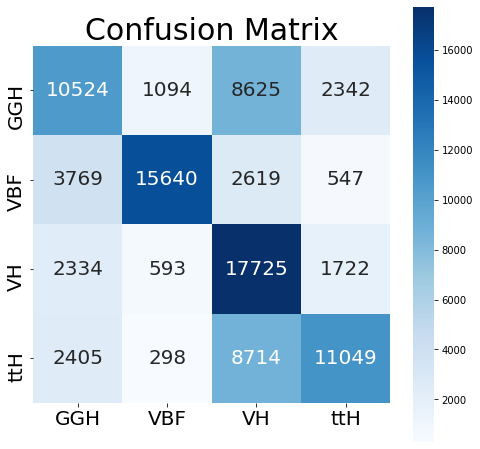

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = tree_model.predict(x_test)
confusion_matrix2 = confusion_matrix(new_y_test, y_pred)

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.set_title('Confusion Matrix', fontsize=30)
classes = ['GGH','VBF','VH','ttH']
sns.heatmap(confusion_matrix2,cmap='Blues', square=True, annot=True, ax=ax,annot_kws={'size':20},fmt = 'n',xticklabels = classes, yticklabels = classes)
ax.tick_params(labelsize=20)

plt.show()

In [ ]:
import graphviz


# DOT data
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names= Hfeatures,  
                                class_names=classes,
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data) 
graph

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

BDT_model = GradientBoostingClassifier()
BDT_model.fit(x_train, y_train)


y_pred = BDT_model.predict(x_test)
accuracy_score(y_test,y_pred)

# low

In [ ]:
Total_Data_LLF = pd.concat([Train_Data_LLF,Test_Data_LLF])

In [ ]:
from sklearn.model_selection import train_test_split
Train_Data_LLF,Test_Data_LLF = train_test_split(Total_Data_LLF, random_state=1000, train_size=0.7)
print(len(Total_Data_LLF))
print(len(Train_Data_LLF))
print(len(Test_Data_LLF))

In [ ]:
Train_new_LLF = Train_Data_LLF.sample(10000)
Test_new_LLF = Test_Data_LLF.sample(10000)

In [ ]:
# x_train, y_train = Train_new_LLF.iloc[:,:-3], Train_new_LLF["label"]
# x_test, y_test = Test_new_LLF.iloc[:,-3], Test_new_LLF["label"]
x_train, y_train = Train_new_LLF.iloc[:,[2,4,5]], Train_new_LLF["label"]
x_test, y_test = Test_new_LLF.iloc[:,[2,4,5]], Test_new_LLF["label"]
x_train

In [ ]:
from sklearn import tree
'''
x_train is a 2-D array training data, each column corresponding to different feature.
y_train is a 1-D array for the data's label.
'''


# Set desicion tree
tree_model = tree.DecisionTreeClassifier(criterion ='entropy',max_depth = 10)
tree_model.fit(x_train, y_train)


Lfeature = ['phi', 'rel_eta', 'rel_phi']
#Lfeature = ['pt', 'eta', 'phi', 'e', 'rel_eta', 'rel_phi']
classes = ['GGH','VBF','VH','ttH']

# Plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=1000) #,figsize = (4,4)
tree.plot_tree(tree_model, feature_names = Lfeature, class_names = classes, filled=True)

# Evaluate model
print('Training Score: ', tree_model.score(x_train,y_train))
print('Testing Score: ', tree_model.score(x_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = tree_model.predict(x_test)
confusion_matrix2 = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.set_title('Confusion Matrix', fontsize=30)
classes = ['GGH','VBF','VH','ttH']
sns.heatmap(confusion_matrix2, square=True, annot=True, ax=ax,annot_kws={'size':20},fmt = 'n',xticklabels = classes, yticklabels = classes)
ax.tick_params(labelsize=20)

plt.show()

[Gradient Boosting Decision Tree Algorithm Explained](https://towardsdatascience.com/machine-learning-part-18-boosting-algorithms-gradient-boosting-in-python-ef5ae6965be4)

[Gradient Boosting ](https://medium.com/@cwchang/gradient-boosting-%E7%B0%A1%E4%BB%8B-f3a578ae7205)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

BDT_model = GradientBoostingClassifier()
BDT_model.fit(x_train, y_train)


y_pred = BDT_model.predict(x_test)
accuracy_score(y_test,y_pred)
